<div align="center">

<img src="https://capsule-render.vercel.app/api?type=waving&color=gradient&customColorList=240046,3c096c,7b2cbf,9d4edd,40e0d0,ff9e00&height=200&section=header&text=NeuroLoft&fontSize=60&fontAlignY=35&desc=Universal%20Deep%20Learning%20Template&descAlignY=60&descAlign=50&fontColor=A0F0E6&animation=fadeIn" width="100%" />

# 🧬 NeuroLoft: Universal Competition Template

> *"Architecting Intelligence from Chaos."*

This notebook serves as the **standard operating procedure** for NeuroLoft deployments. It includes:
- 🌑 **Dark Mode Visualization**
- 🎲 **Reproducibility (Seed Everything)**
- 🧠 **PyTorch Lightning / Native Loop Skeleton**
- 📊 **Advanced EDA Setup**

</div>

---

## 1. 📡 System Initialization
*Setting up the environment, seeds, and hardware acceleration.*

In [5]:
import os
import random
import time
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# --- NeuroLoft Aesthetic Config ---
plt.style.use('dark_background')
sns.set_palette("viridis")
warnings.filterwarnings('ignore')

# --- Reproducibility ---
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

SEED = 2025
seed_everything(SEED)

# --- Hardware Check ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🟢 System Ready. Compute Node: {device}")
if device.type == 'cuda':
    print(f"🚀 GPU: {torch.cuda.get_device_name(0)}")
else:
    print("⚠️ Running on CPU. Performance may be limited.")

🟢 System Ready. Compute Node: cpu
⚠️ Running on CPU. Performance may be limited.


## 2. 💾 Data Plane Activation
*Ingesting raw data, performing EDA, and preparing DataLoaders.*

In [6]:
# --- Configuration ---
DATA_PATH = '/kaggle/input/competition-name/'
TRAIN_FILE = 'train.csv'
TEST_FILE = 'test.csv'
TARGET_COL = 'target'

# --- Load Data (Mockup for Template) ---
# In a real competition, uncomment the lines below:
# df_train = pd.read_csv(os.path.join(DATA_PATH, TRAIN_FILE))
# df_test = pd.read_csv(os.path.join(DATA_PATH, TEST_FILE))

# Generating Synthetic Data for Template Demonstration
print("⚠️ Generating Synthetic Data for Template...")
N_SAMPLES = 1000
N_FEATURES = 10
df_train = pd.DataFrame(np.random.randn(N_SAMPLES, N_FEATURES), columns=[f'feature_{i}' for i in range(N_FEATURES)])
df_train[TARGET_COL] = np.random.randint(0, 2, N_SAMPLES) # Binary classification
df_test = pd.DataFrame(np.random.randn(200, N_FEATURES), columns=[f'feature_{i}' for i in range(N_FEATURES)])

print(f"📊 Train Shape: {df_train.shape}")
print(f"📊 Test Shape: {df_test.shape}")
df_train.head()

⚠️ Generating Synthetic Data for Template...
📊 Train Shape: (1000, 11)
📊 Test Shape: (200, 10)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,-0.092390,0.734286,-1.438882,-0.663422,-0.100728,2.146987,1.393708,-0.207371,0.763587,0.205054,1
1,-1.041496,-0.828076,-1.053796,-0.088759,0.158193,-1.789323,1.063482,0.037120,-0.163758,-0.328208,1
2,1.588977,-0.188783,-0.181723,0.717900,-0.000707,0.782167,0.086991,0.066256,1.200565,-0.061665,1
3,-0.900906,-1.259248,0.056633,-0.966219,0.748556,0.278186,-0.310756,-0.653905,-0.072948,0.591938,1
4,0.857604,-1.194178,1.901541,-0.645184,-1.182197,1.552205,1.216322,0.936337,-0.675551,1.069320,0


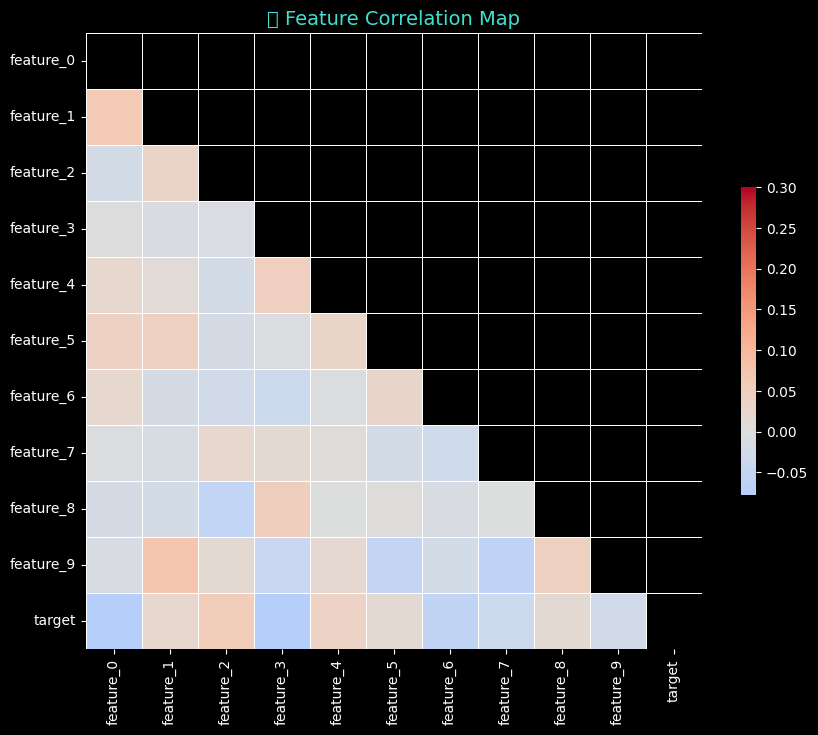

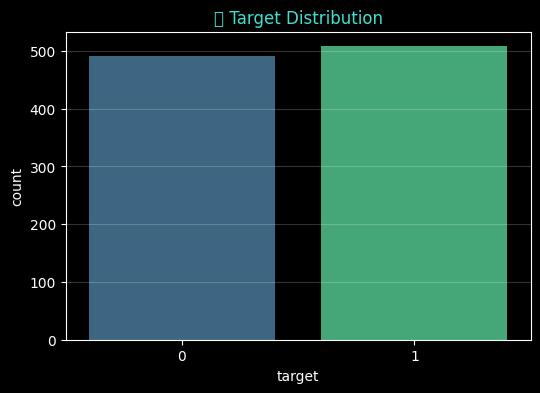

In [7]:
# --- Advanced EDA ---
# Correlation Matrix
plt.figure(figsize=(10, 8))
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("🧬 Feature Correlation Map", color='#40E0D0', fontsize=14)
plt.show()

# Distribution of Target
plt.figure(figsize=(6, 4))
sns.countplot(x=TARGET_COL, data=df_train, palette='viridis')
plt.title("🎯 Target Distribution", color='#40E0D0')
plt.grid(axis='y', alpha=0.2)
plt.show()

## 3. 🧠 Intelligence Core Construction
*Defining the Dataset class and Neural Network Architecture.*

In [8]:
# --- Custom Dataset ---
class NeuroDataset(Dataset):
    def __init__(self, df, features, target=None):
        self.df = df
        self.features = features
        self.target = target
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        x = torch.tensor(row[self.features].values.astype(np.float32), dtype=torch.float32)
        if self.target:
            y = torch.tensor(row[self.target], dtype=torch.float32)
            return x, y
        return x

# --- Data Loaders ---
features = [c for c in df_train.columns if c != TARGET_COL]

# Fix: Split the dataframe directly. X_train will contain the target column.
# No need to join y_train separately as it causes column overlap.
X_train, X_val = train_test_split(df_train, test_size=0.2, random_state=SEED)

train_dataset = NeuroDataset(X_train, features, TARGET_COL)
val_dataset = NeuroDataset(X_val, features, TARGET_COL)
test_dataset = NeuroDataset(df_test, features, target=None)

BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# --- Neural Architecture ---
class NeuroNet(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, output_dim=1):
        super(NeuroNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Linear(hidden_dim // 2, output_dim)
        )
        
    def forward(self, x):
        return self.net(x)

model = NeuroNet(input_dim=len(features)).to(device)
print(model)

NeuroNet(
  (net): Sequential(
    (0): Linear(in_features=10, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)


## 4. 🔮 Neural Interface Simulation (Training)
*Training loop with progress tracking and validation.*

🚀 Initiating Training Sequence...


Epoch 1/10:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch 1 | Train Loss: 0.6965 | Val Loss: 0.6889


Epoch 2/10:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch 2 | Train Loss: 0.6910 | Val Loss: 0.6872


Epoch 3/10:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch 3 | Train Loss: 0.6858 | Val Loss: 0.6878


Epoch 4/10:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch 4 | Train Loss: 0.6875 | Val Loss: 0.6880


Epoch 5/10:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch 5 | Train Loss: 0.6773 | Val Loss: 0.6866


Epoch 6/10:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch 6 | Train Loss: 0.6778 | Val Loss: 0.6860


Epoch 7/10:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch 7 | Train Loss: 0.6785 | Val Loss: 0.6883


Epoch 8/10:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch 8 | Train Loss: 0.6785 | Val Loss: 0.6893


Epoch 9/10:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch 9 | Train Loss: 0.6747 | Val Loss: 0.6893


Epoch 10/10:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch 10 | Train Loss: 0.6766 | Val Loss: 0.6905


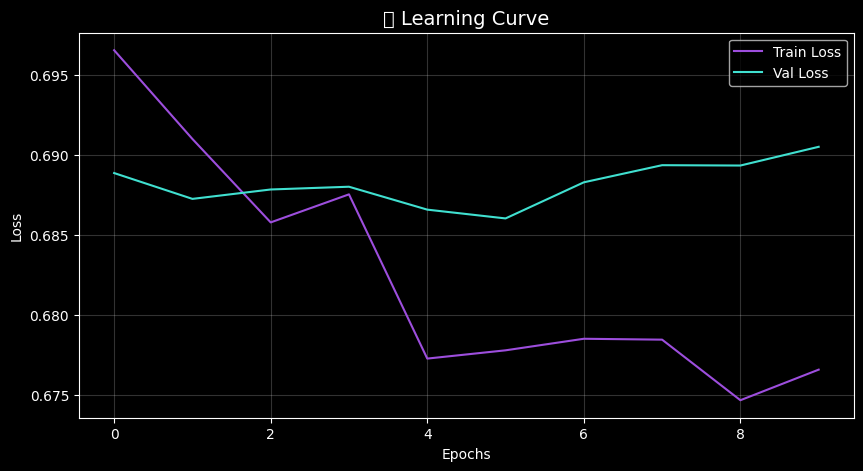

In [9]:
# --- Hyperparameters ---
EPOCHS = 10
LR = 1e-3
criterion = nn.BCEWithLogitsLoss() # For Binary Classification
optimizer = optim.Adam(model.parameters(), lr=LR)

# --- Training Loop ---
print("🚀 Initiating Training Sequence...")
history = {'train_loss': [], 'val_loss': []}

for epoch in range(EPOCHS):
    # Train
    model.train()
    train_loss = 0
    for x_batch, y_batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}", leave=False):
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        y_pred = model(x_batch).squeeze()
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        
    avg_train_loss = train_loss / len(train_loader)
    
    # Validate
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x_batch, y_batch in val_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            y_pred = model(x_batch).squeeze()
            loss = criterion(y_pred, y_batch)
            val_loss += loss.item()
            
    avg_val_loss = val_loss / len(val_loader)
    
    history['train_loss'].append(avg_train_loss)
    history['val_loss'].append(avg_val_loss)
    
    print(f"Epoch {epoch+1} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

# --- Plot History ---
plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss', color='#9d4edd')
plt.plot(history['val_loss'], label='Val Loss', color='#40E0D0')
plt.title("📉 Learning Curve", fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

## 5. 📤 Submission
*Generating the final output artifact.*

```python
# --- Inference ---
model.eval()
predictions = []
with torch.no_grad():
    for x_batch in test_loader:
        x_batch = x_batch.to(device)
        y_pred = torch.sigmoid(model(x_batch)).squeeze() # Sigmoid for probability
        predictions.extend(y_pred.cpu().numpy())

# --- Create Submission File ---
submission = pd.DataFrame({
    'id': range(len(predictions)), # Adjust ID column as per competition
    'target': predictions
})

submission.to_csv('submission.csv', index=False)
print("💾 Submission file 'submission.csv' generated successfully.")
submission.head()
```

---
<div align="center">

### *"Shelter from the storm: warm coffee and deep code."*

</div>